<a href="https://colab.research.google.com/github/subhash505/NLP_code/blob/main/1_DL_MNIST_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras_MNIST
### (Solutions)
The MNIST data is a database of handwritten digits from 0 to 9. The database contains 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. Your task is to create an ANN model for identifying the digit from the handwritten images.
Please perform the following tasks:
•	Load the database to variable named digit_mnist using the Keras inbuilt datasets (digit_mnist = keras.datasets.mnist)
•	Import data to create X_train_full, y_train_full, X_test and y_test variables
•	Normalize the data
•	Create a validation set of 6000 images
•	Create an ANN model with two dense layers of 200 and 100 neurons
•	Compile and train the model for 60 epochs
•	Plot the loss and accuracy against epoch
•	Evaluate the model accuracy on the test dataset
•	Predict the digit for the first 5 records of the test dataset


In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
digit_mnist = keras.datasets.mnist

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = digit_mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


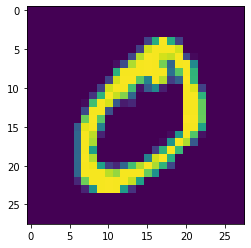

In [ ]:
plt.imshow(X_train_full[1])

In [ ]:
y_train_full[1]

0

In [ ]:
X_train_full[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

In [ ]:
X_valid, X_train = X_train_n[:6000], X_train_n[6000:]
y_valid, y_train = y_train_full[:6000], y_train_full[6000:]
X_test = X_test_n

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
model_history = model.fit(X_train, y_train, epochs=60,
                    validation_data=(X_valid, y_valid))

Epoch 1/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6607 - accuracy: 0.8267 - val_loss: 0.3216 - val_accuracy: 0.9125
Epoch 2/60
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3006 - accuracy: 0.9141 - val_loss: 0.2585 - val_accuracy: 0.9283
Epoch 3/60
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2488 - accuracy: 0.9292 - val_loss: 0.2254 - val_accuracy: 0.9383
Epoch 4/60
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2151 - accuracy: 0.9390 - val_loss: 0.1961 - val_accuracy: 0.9442
Epoch 5/60
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1893 - accuracy: 0.9461 - val_loss: 0.1790 - val_accuracy: 0.9485
Epoch 6/60
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1690 - accuracy: 0.9517 - val_loss: 0.1637 - val_accuracy: 0.9523
Epoch 7/60
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1521 - accuracy: 0.9569 - val_loss: 0.1482 - val_accuracy:

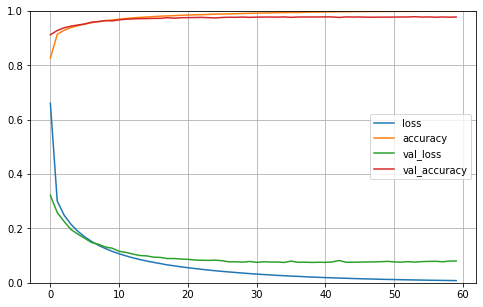

In [ ]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0738 - accuracy: 0.9794


In [ ]:
test_acc

[0.07376761734485626, 0.9793999791145325]

In [ ]:
X_new = X_test[:3]

In [ ]:
y_pred = model.predict(X_new)
y_pred

array([[1.2033725e-07, 2.0798858e-09, 1.8192550e-06, 6.0515518e-05,
        7.3647505e-10, 2.0465448e-07, 3.2177784e-13, 9.9992609e-01,
        8.2525327e-07, 1.0329985e-05],
       [1.9082056e-09, 5.9207019e-07, 9.9999809e-01, 1.3382626e-06,
        1.2514826e-15, 1.6623222e-10, 7.9006375e-09, 5.7027506e-17,
        1.3118225e-08, 8.4463321e-18],
       [1.2612912e-06, 9.9940550e-01, 9.2520686e-06, 1.7371160e-06,
        2.2804887e-04, 1.9224383e-06, 1.5771442e-05, 2.5364451e-04,
        8.1697232e-05, 1.1355307e-06]], dtype=float32)

AxesImage(54,36;334.8x217.44)


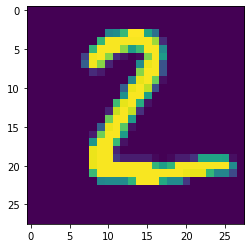

In [ ]:
print(plt.imshow(X_test[1]))